Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.6659827441077442
ROC AUC: 0.4940146810597239
              precision    recall  f1-score   support

           0       0.67      1.00      0.80     12659
           1       1.00      0.00      0.00      6349

    accuracy                           0.67     19008
   macro avg       0.83      0.50      0.40     19008
weighted avg       0.78      0.67      0.53     19008



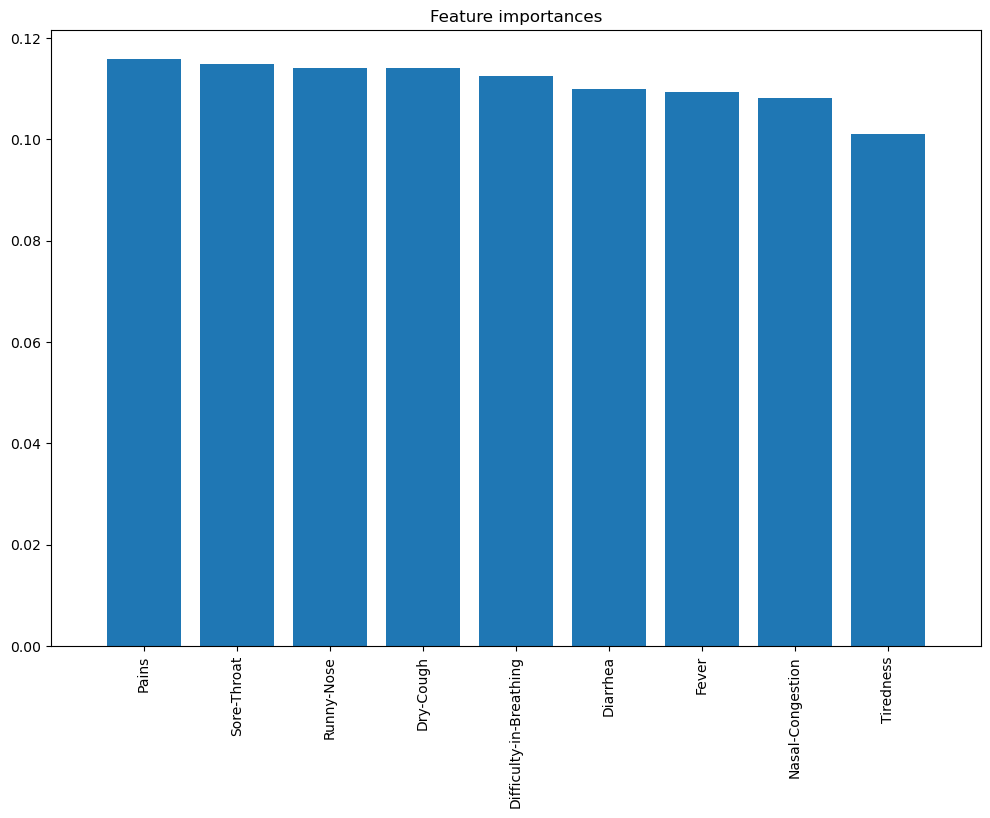

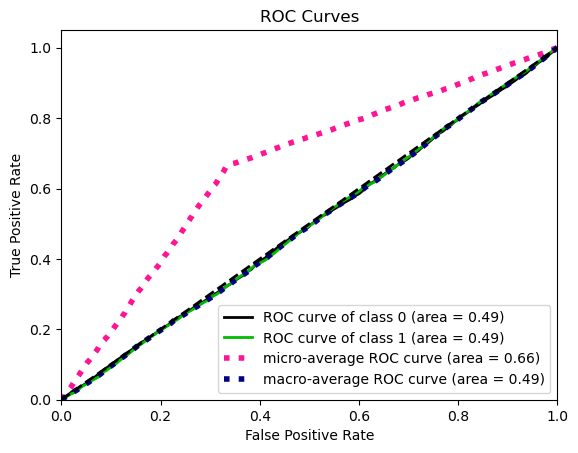

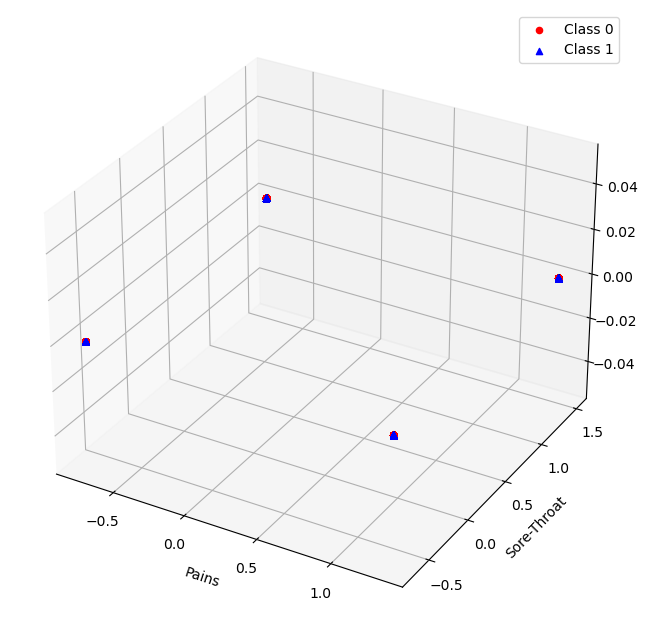

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import scikitplot as skplt

data = pd.read_csv('C:/Users/jhonn/Downloads/Etapa4/Cleaned-Data.csv')


features = [
    'Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
    'Sore-Throat', 'Pains', 'Nasal-Congestion', 'Runny-Nose',
    'Diarrhea', 'Contact_Yes'
]


data = data[features]


data_sample = data.sample(frac=0.3, random_state=42)


X = data_sample.drop('Contact_Yes', axis=1)
y = data_sample['Contact_Yes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}


rf = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)


grid_search.fit(X_train_scaled, y_train)


best_rf = grid_search.best_estimator_


y_pred = best_rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)
roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test_scaled)[:, 1])
feature_importances = best_rf.feature_importances_


print(f"Best parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print(report)


plt.figure(figsize=(12, 8))
feature_names = X.columns
indices = np.argsort(feature_importances)[::-1]
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


skplt.metrics.plot_roc(y_test, best_rf.predict_proba(X_test_scaled))
plt.show()


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


most_important_features = X_test_scaled[:, indices[:2]]
ax.scatter(most_important_features[y_test == 0][:, 0], most_important_features[y_test == 0][:, 1], c='red', marker='o', label='Class 0')
ax.scatter(most_important_features[y_test == 1][:, 0], most_important_features[y_test == 1][:, 1], c='blue', marker='^', label='Class 1')

ax.set_xlabel(feature_names[indices[0]])
ax.set_ylabel(feature_names[indices[1]])
ax.legend()
plt.show()
